In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 0us/step


In [5]:
print(X_train_full.shape, X_train_full.dtype)

(60000, 28, 28) uint8


In [6]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [8]:
class_names[y_train[0]]

'Coat'

In [12]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.layers

In [16]:
model.layers[1].name

'dense'

In [17]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [18]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 6s 118us/sample - loss: 0.7087 - accuracy: 0.7676 - val_loss: 0.5094 - val_accuracy: 0.8254
Epoch 2/30
55000/55000 [==============================] - 6s 108us/sample - loss: 0.4822 - accuracy: 0.8319 - val_loss: 0.4350 - val_accuracy: 0.8542
Epoch 3/30
55000/55000 [==============================] - 6s 103us/sample - loss: 0.4389 - accuracy: 0.8467 - val_loss: 0.4277 - val_accuracy: 0.8554
Epoch 4/30
55000/55000 [==============================] - 6s 106us/sample - loss: 0.4122 - accuracy: 0.8543 - val_loss: 0.3895 - val_accuracy: 0.8688
Epoch 5/30
55000/55000 [==============================] - 6s 105us/sample - loss: 0.3924 - accuracy: 0.8611 - val_loss: 0.4050 - val_accuracy: 0.8596
Epoch 6/30
55000/55000 [==============================] - 6s 106us/sample - loss: 0.3777 - accuracy: 0.8656 - val_loss: 0.3775 - val_accuracy: 0.8690
Epoch 7/30
55000/55000 [===========================

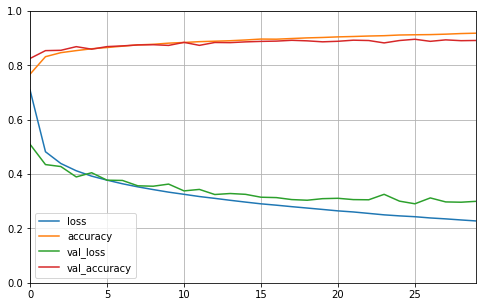

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [22]:
model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[60.7264670835495, 0.8484]

In [23]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 5s 100us/sample - loss: 0.2232 - accuracy: 0.9196 - val_loss: 0.2947 - val_accuracy: 0.8950
Epoch 2/10
55000/55000 [==============================] - 6s 105us/sample - loss: 0.2206 - accuracy: 0.9205 - val_loss: 0.3038 - val_accuracy: 0.8914
Epoch 3/10
55000/55000 [==============================] - 6s 104us/sample - loss: 0.2166 - accuracy: 0.9229 - val_loss: 0.3145 - val_accuracy: 0.8898
Epoch 4/10
55000/55000 [==============================] - 6s 102us/sample - loss: 0.2140 - accuracy: 0.9238 - val_loss: 0.2968 - val_accuracy: 0.8896
Epoch 5/10
55000/55000 [==============================] - 6s 105us/sample - loss: 0.2106 - accuracy: 0.9249 - val_loss: 0.3134 - val_accuracy: 0.8830
Epoch 6/10
55000/55000 [==============================] - 5s 98us/sample - loss: 0.2067 - accuracy: 0.9260 - val_loss: 0.3119 - val_accuracy: 0.8854
Epoch 7/10
55000/55000 [============================

In [24]:
model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[71.48156207136492, 0.842]

In [25]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [26]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1])

In [28]:
import numpy as np
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')